In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('video_sessions_transformed.csv')

In [2]:
df.head()

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
0,5137060586,197846393764,0,vk_video_ios,video_for_you,1524753638856
1,6791352918,255312742952,0,vk_video_android,video_search,1524750811524
2,8499858010,290290140528,2,vk_video_android,video_for_you,1524751697154
3,13064371614,296968444192,0,vk_video_android,video_search,1524751112304
4,15865765790,283074246524,0,vk_video_android,video_for_you,1524752278662


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          4503 non-null   int64 
 1   video_owner_id   4503 non-null   int64 
 2   total_view_time  4503 non-null   int64 
 3   vk_platform      4503 non-null   object
 4   nav_screen       4503 non-null   object
 5   video_id         4503 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 211.2+ KB


In [4]:
df.isnull().sum()

user_id            0
video_owner_id     0
total_view_time    0
vk_platform        0
nav_screen         0
video_id           0
dtype: int64

In [5]:
df.describe()

,user_id,video_owner_id,total_view_time,video_id
count,4.503000e+03,4.503000e+03,4.503000e+03,4.503000e+03
mean,1.233544e+13,1.811593e+11,1.046599e+05,1.508005e+12
std,1.076879e+13,2.015803e+11,4.959592e+06,1.289130e+11
min,2.085183e+08,-1.122277e+12,-3.000000e+02,2.344280e+06
25%,2.248819e+12,1.377161e+11,0.000000e+00,1.524752e+12
50%,9.657196e+12,2.542896e+11,0.000000e+00,1.524754e+12
75%,2.048263e+13,2.839772e+11,2.000000e+00,1.524762e+12
max,3.729999e+13,2.649073e+12,2.405022e+08,1.525612e+12


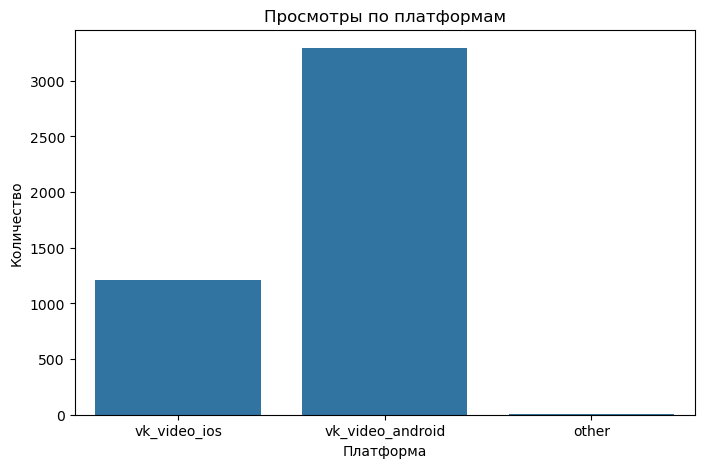

In [6]:
# Платформы
plt.figure(figsize=(8, 5))
sns.countplot(x='vk_platform', data=df)
plt.title('Просмотры по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()

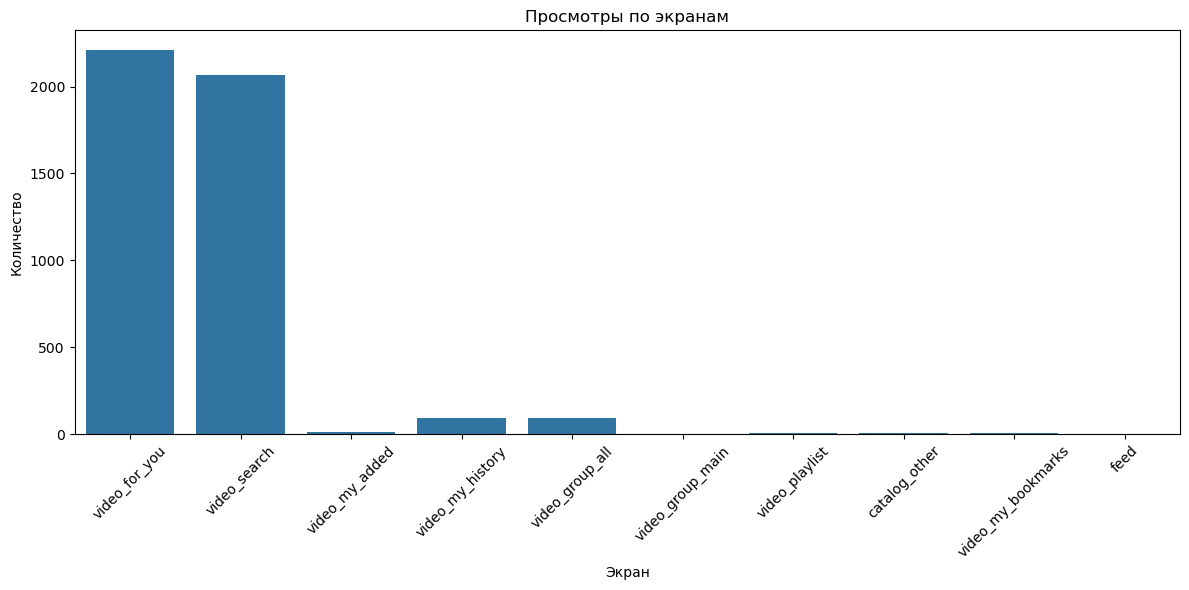

In [7]:
# Экраны
plt.figure(figsize=(12, 6))
sns.countplot(x='nav_screen', data=df)
plt.title('Просмотры по экранам')
plt.xlabel('Экран')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df['total_view_time'].describe()

count    4.503000e+03
mean     1.046599e+05
std      4.959592e+06
min     -3.000000e+02
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      2.405022e+08
Name: total_view_time, dtype: float64

In [9]:
df = df[df['total_view_time'] >= 0]

In [10]:
# 86400 с = 24 часа
df = df[df['total_view_time'] <= 86400]

In [11]:
df.to_csv('video_sessions_cleaned.csv', index=False)

In [12]:
df['total_view_time'].describe()

count     4500.000000
mean       151.378667
std        910.743208
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      25945.000000
Name: total_view_time, dtype: float64

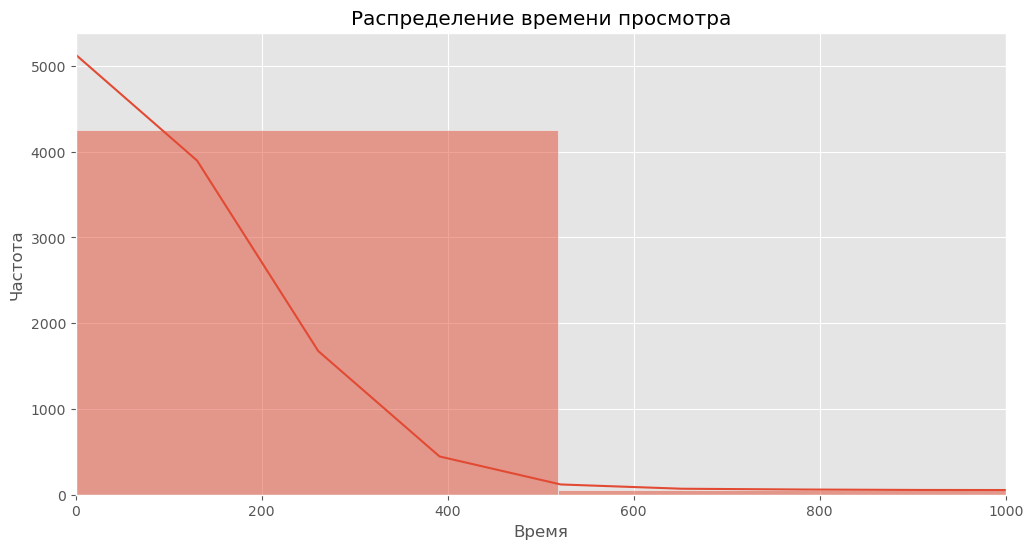

In [13]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

plt.figure()
sns.histplot(df['total_view_time'], bins=50, kde=True)
plt.title('Распределение времени просмотра')
plt.xlabel('Время')
plt.ylabel('Частота')
plt.xlim(0, 1000)
plt.show()

In [14]:
Q1 = df['total_view_time'].quantile(0.25)
Q3 = df['total_view_time'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
up = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Нижняя граница: {low}, Верхняя граница: {up}")

Q1: 0.0, Q3: 2.0, IQR: 2.0
Нижняя граница: -3.0, Верхняя граница: 5.0


In [15]:
df_no_outliers = df[(df['total_view_time'] >= low) & (df['total_view_time'] <= up)]

print(f"Начальное количество записей: {len(df)}")
print(f"Количество записей без выбросов: {len(df_no_outliers)}")

Начальное количество записей: 4500
Количество записей без выбросов: 3757


In [16]:
threshold = 86400 # 1 сутки
df_no_outliers = df[df['total_view_time'] <= threshold]
outliers = df[df['total_view_time'] > threshold]

print(f"Начальное количество записей: {len(df)}")
print(f"Количество записей без выбросов (до 1 суток): {len(df_no_outliers)}")
print("Статистика выбросов (более 1 суток):")
print(outliers['total_view_time'].describe())
print("Выбросы по платформам:")
print(outliers['vk_platform'].value_counts())
print("Выбросы по экранам:")
print(outliers['nav_screen'].value_counts())

Начальное количество записей: 4500
Количество записей без выбросов (до 1 суток): 4500
Статистика выбросов (более 1 суток):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: total_view_time, dtype: float64
Выбросы по платформам:
Series([], Name: count, dtype: int64)
Выбросы по экранам:
Series([], Name: count, dtype: int64)


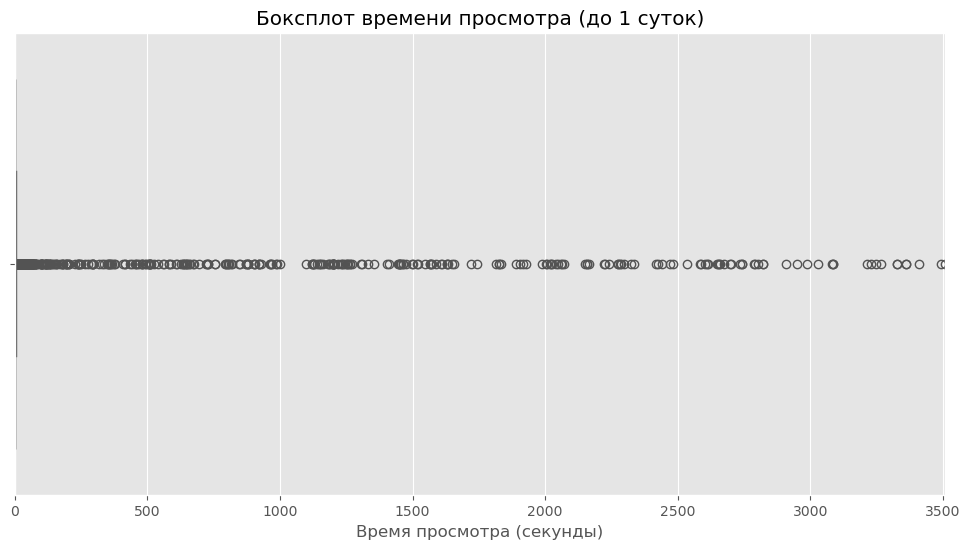

In [17]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

plt.figure()
sns.boxplot(x=df_no_outliers['total_view_time'])
plt.title('Боксплот времени просмотра (до 1 суток)')
plt.xlabel('Время просмотра (секунды)')
plt.xlim(0, df_no_outliers['total_view_time'].quantile(0.99))
plt.show()

In [18]:
print("Статистика очищенных данных:")
print(df_no_outliers['total_view_time'].describe())

outliers_iqr = df[df['total_view_time'] > 5] 
print("\nСтатистика значений > 5 секунд:")
print(outliers_iqr['total_view_time'].describe())
print("\nКоличество значений > 5 секунд по платформам:")
print(outliers_iqr['vk_platform'].value_counts())
print("\nКоличество значений > 5 секунд по экранам:")
print(outliers_iqr['nav_screen'].value_counts())

Статистика очищенных данных:
count     4500.000000
mean       151.378667
std        910.743208
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      25945.000000
Name: total_view_time, dtype: float64

Статистика значений > 5 секунд:
count      743.000000
mean       913.473755
std       2081.505633
min          6.000000
25%         10.000000
50%         45.000000
75%       1120.000000
max      25945.000000
Name: total_view_time, dtype: float64

Количество значений > 5 секунд по платформам:
vk_platform
vk_video_android    545
vk_video_ios        198
Name: count, dtype: int64

Количество значений > 5 секунд по экранам:
nav_screen
video_search          306
video_for_you         285
video_my_history       83
video_group_all        50
video_my_added          7
video_my_bookmarks      6
catalog_other           3
video_playlist          2
video_group_main        1
Name: count, dtype: int64


Количество записей после фильтрации до 1 часа: 4456


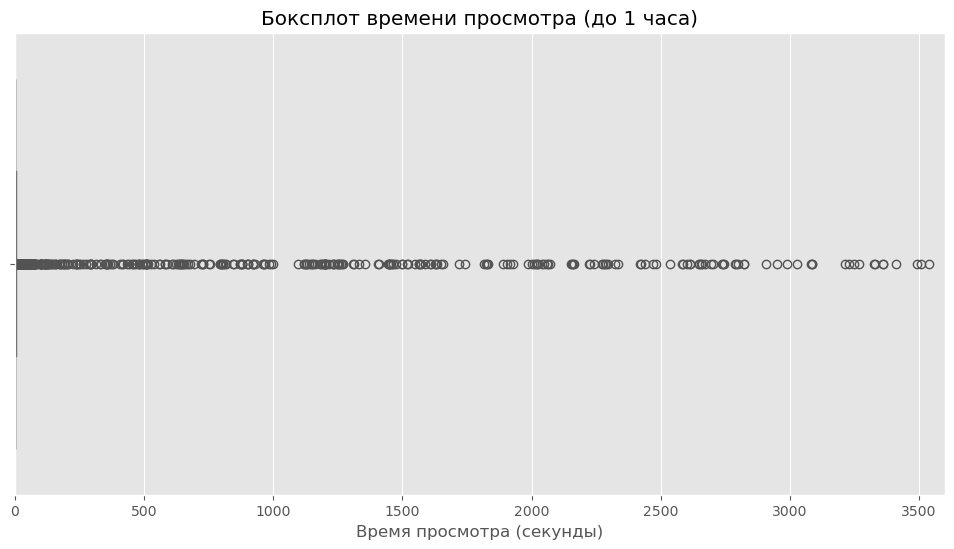

In [19]:
df_final = df[df['total_view_time'] <= 3600]
print(f"Количество записей после фильтрации до 1 часа: {len(df_final)}")

plt.figure()
sns.boxplot(x=df_final['total_view_time'])
plt.title('Боксплот времени просмотра (до 1 часа)')
plt.xlabel('Время просмотра (секунды)')
plt.xlim(0, 3600)
plt.show()

In [20]:
threshold_hour = 3600  # 1 час
long_sessions = df[df['total_view_time'] > threshold_hour]
print(f"Количество записей > 1 часа: {len(long_sessions)}")
print("\nСтатистика записей > 1 часа:")
print(long_sessions['total_view_time'].describe())
print("\nРаспределение по платформам:")
print(long_sessions['vk_platform'].value_counts())
print("\nРаспределение по экранам:")
print(long_sessions['nav_screen'].value_counts())

Количество записей > 1 часа: 44

Статистика записей > 1 часа:
count       44.000000
mean      7170.750000
std       4525.057168
min       3751.000000
25%       4507.250000
50%       5934.000000
75%       7867.000000
max      25945.000000
Name: total_view_time, dtype: float64

Распределение по платформам:
vk_platform
vk_video_ios        24
vk_video_android    20
Name: count, dtype: int64

Распределение по экранам:
nav_screen
video_for_you         18
video_search          14
video_my_history       9
video_playlist         1
video_my_bookmarks     1
video_group_all        1
Name: count, dtype: int64


In [21]:
conscious_views = df[df['total_view_time'] > 30]
platform_views = conscious_views['vk_platform'].value_counts()
print("Количество просмотров > 30 секунд по платформам:")
print (platform_views)
top_platform = platform_views.idxmax()
top_platform_clean = top_platform.replace('vk_video_', '')
top_count = platform_views.max()
print(f"\nПлатформа с наибольшим количеством просмотров > 30 секунд: {top_platform_clean} ({top_count})")

Количество просмотров > 30 секунд по платформам:
vk_platform
vk_video_android    272
vk_video_ios        123
Name: count, dtype: int64

Платформа с наибольшим количеством просмотров > 30 секунд: android (272)


In [22]:
print("\nКоличество просмотров > 30 секунд по экранам:")
print(conscious_views['nav_screen'].value_counts())


Количество просмотров > 30 секунд по экранам:
nav_screen
video_search          160
video_for_you         122
video_my_history       78
video_group_all        25
video_my_added          4
video_playlist          2
video_my_bookmarks      2
catalog_other           1
video_group_main        1
Name: count, dtype: int64


In [23]:
print("\nСредняя длительность просмотров > 30 секунд по платформам:")
print(conscious_views.groupby('vk_platform')['total_view_time'].mean())


Средняя длительность просмотров > 30 секунд по платформам:
vk_platform
vk_video_android    1353.724265
vk_video_ios        2491.113821
Name: total_view_time, dtype: float64


Топ-10 сообществ по суммарному времени просмотра (в секундах):

video_owner_id
279672446984    104638
105949036644     38595
279942606536     34615
145819277544     31157
292769954132     24399
140097381168     23929
283348041780     22196
292278366172     20639
225987071076     16113
283074246524     13193
Name: total_view_time, dtype: int64


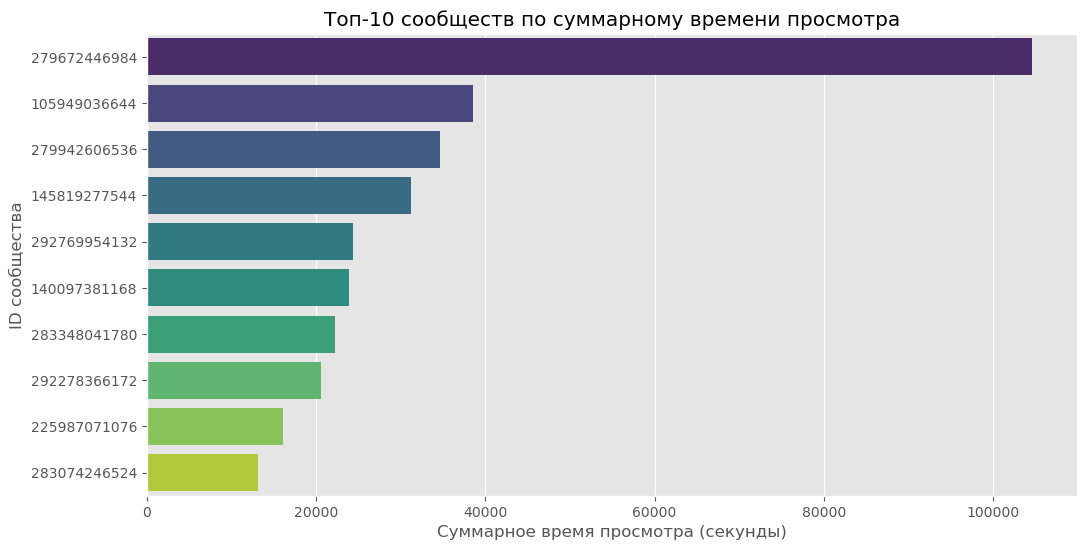

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('video_sessions_transformed.csv')
df = df[df['total_view_time'] >= 0]
df_no_outliers = df[df['total_view_time'] <= 86400]  # Очистка от значений > 1 суток

community_view_time = df_no_outliers.groupby('video_owner_id')['total_view_time'].sum().sort_values(ascending=False)

top_10_communities = community_view_time.head(10)

print("Топ-10 сообществ по суммарному времени просмотра (в секундах):\n")
print(top_10_communities)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

plt.figure()
sns.barplot(x=top_10_communities.values, y=top_10_communities.index.astype(str), hue=top_10_communities.index.astype(str), palette='viridis', legend=False)
plt.title('Топ-10 сообществ по суммарному времени просмотра')
plt.xlabel('Суммарное время просмотра (секунды)')
plt.ylabel('ID сообщества')
plt.show()

In [25]:
top_communities_ids = top_10_communities.index
top_communities_data = df_no_outliers[df_no_outliers['video_owner_id'].isin(top_communities_ids)]
print("Просмотры топ-10 сообществ по платформам:\n")
print(top_communities_data.groupby('video_owner_id')['vk_platform'].value_counts())

Просмотры топ-10 сообществ по платформам:

video_owner_id  vk_platform     
105949036644    vk_video_android     10
                vk_video_ios          9
140097381168    vk_video_android     14
                vk_video_ios          7
145819277544    vk_video_ios         75
                vk_video_android     67
225987071076    vk_video_android      1
                vk_video_ios          1
279672446984    vk_video_android    104
                vk_video_ios         87
279942606536    vk_video_ios         31
                vk_video_android     28
283074246524    vk_video_android     45
                vk_video_ios         30
283348041780    vk_video_android      8
                vk_video_ios          5
292278366172    vk_video_android    105
                vk_video_ios         76
292769954132    vk_video_android     25
                vk_video_ios         25
Name: count, dtype: int64


In [26]:
print("Распределение просмотров топ-10 сообществ по экранам:\n")
print(top_communities_data.groupby('video_owner_id')['nav_screen'].value_counts())

Распределение просмотров топ-10 сообществ по экранам:

video_owner_id  nav_screen      
105949036644    video_for_you        10
                video_search          8
                video_my_history      1
140097381168    video_for_you         9
                video_search          7
                video_my_history      5
145819277544    video_for_you       116
                video_search         21
                video_my_history      4
                video_playlist        1
225987071076    video_for_you         2
279672446984    video_for_you       123
                video_search         55
                video_my_history      9
                video_group_all       4
279942606536    video_for_you        32
                video_search         15
                video_my_history      7
                video_group_all       5
283074246524    video_for_you        53
                video_search         20
                video_my_history      2
283348041780    video_search    

Суммарное время просмотра по длительности:
duration_category
Меньше 1 часа     346407
Больше 1 часа     315513
Меньше 5 минут     19284
Name: total_view_time, dtype: int64


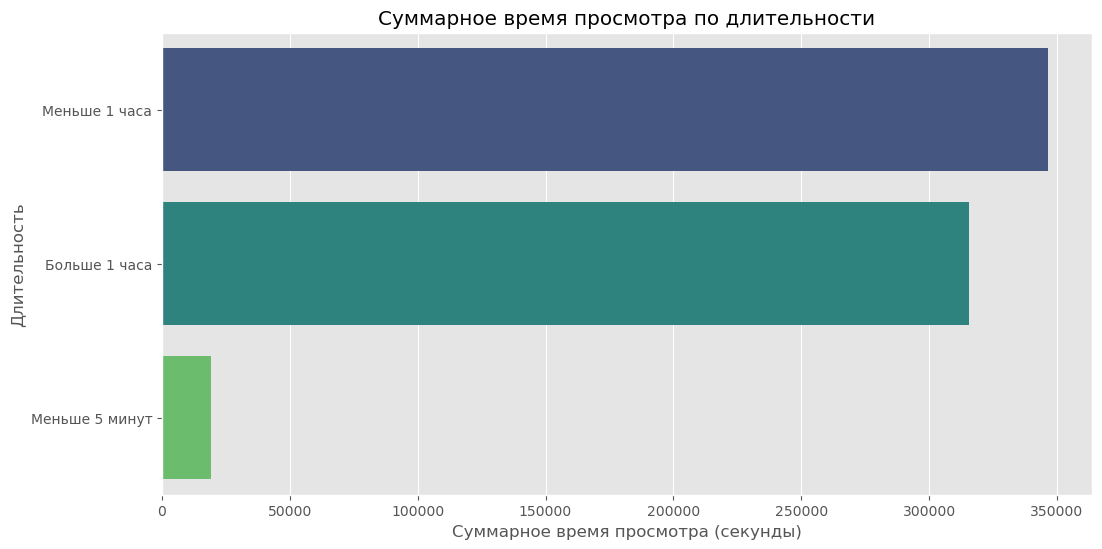

In [27]:
df = pd.read_csv('video_sessions_transformed.csv')
df = df[df['total_view_time'] >= 0]
df_no_outliers = df[df['total_view_time'] <= 86400].copy()  # Создаем копию

def classify_duration(time):
    if time <= 300:
        return 'Меньше 5 минут'
    elif time <= 3600:
        return 'Меньше 1 часа'
    else:
        return 'Больше 1 часа'

df_no_outliers.loc[:, 'duration_category'] = df_no_outliers['total_view_time'].apply(classify_duration)

duration_view_time = df_no_outliers.groupby('duration_category')['total_view_time'].sum().sort_values(ascending=False)

print("Суммарное время просмотра по длительности:")
print(duration_view_time)

plt.figure()
sns.barplot(x=duration_view_time.values, y=duration_view_time.index, hue=duration_view_time.index, palette='viridis', legend=False)
plt.title('Суммарное время просмотра по длительности')
plt.xlabel('Суммарное время просмотра (секунды)')
plt.ylabel('Длительность')
plt.show()

Среднее время просмотра по экранам (в секундах):
nav_screen
video_my_history      1635.389474
video_playlist        1272.750000
video_my_bookmarks    1016.333333
video_group_all        320.032609
video_group_main       316.500000
video_my_added         254.357143
video_search           127.239845
video_for_you           98.391501
catalog_other           34.571429
Name: total_view_time, dtype: float64


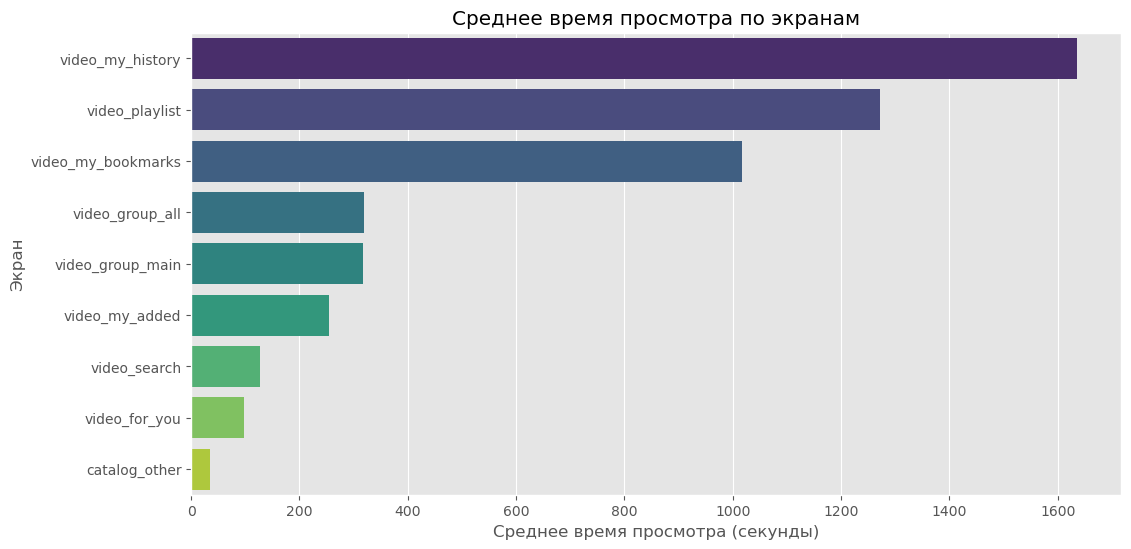

In [28]:
screen_avg_time = df_no_outliers.groupby('nav_screen')['total_view_time'].mean().sort_values(ascending=False)

print("Среднее время просмотра по экранам (в секундах):")
print(screen_avg_time)

plt.figure()
sns.barplot(x=screen_avg_time.values, y=screen_avg_time.index, hue=screen_avg_time.index, palette='viridis', legend=False)
plt.title('Среднее время просмотра по экранам')
plt.xlabel('Среднее время просмотра (секунды)')
plt.ylabel('Экран')
plt.show()

Среднее время просмотра по платформам и экранам (в секундах):
vk_platform       nav_screen        
vk_video_ios      video_my_history      1915.200000
                  video_playlist        1697.000000
                  video_my_bookmarks    1528.333333
vk_video_android  video_my_history      1383.560000
                  video_my_bookmarks     504.333333
                  video_group_all        320.032609
                  video_group_main       316.500000
vk_video_ios      video_search           285.723529
vk_video_android  video_my_added         273.846154
vk_video_ios      video_for_you          141.950617
vk_video_android  video_search            96.056713
                  video_for_you           73.225392
                  catalog_other           58.750000
vk_video_ios      catalog_other            2.333333
                  video_my_added           1.000000
vk_video_android  video_playlist           0.000000
Name: total_view_time, dtype: float64


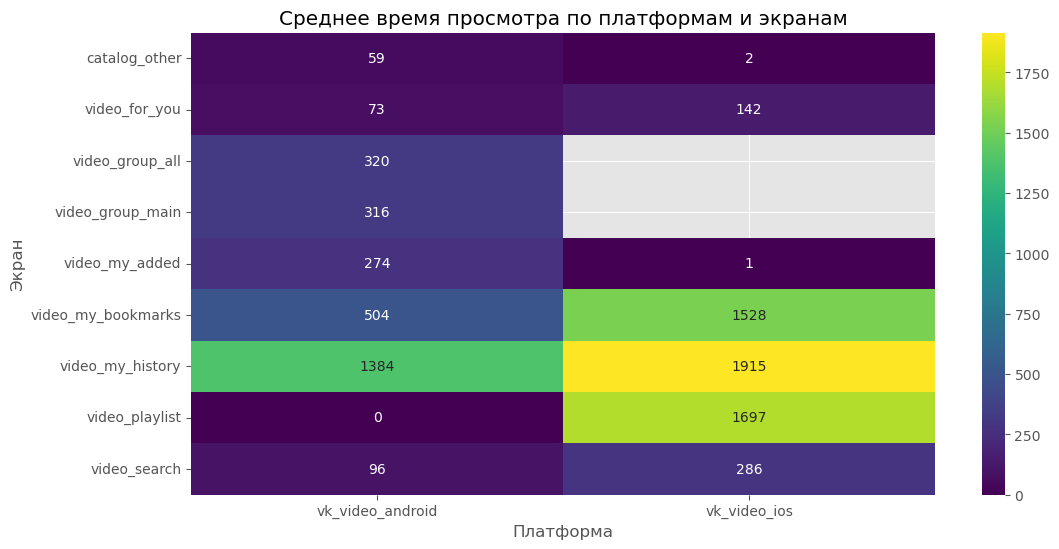

In [29]:
platform_screen_avg_time = df_no_outliers.groupby(['vk_platform', 'nav_screen'])['total_view_time'].mean().sort_values(ascending=False)

print("Среднее время просмотра по платформам и экранам (в секундах):")
print(platform_screen_avg_time)

pivot_table = df_no_outliers.pivot_table(values='total_view_time', index='nav_screen', columns='vk_platform', aggfunc='mean')
plt.figure()
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='viridis')
plt.title('Среднее время просмотра по платформам и экранам')
plt.xlabel('Платформа')
plt.ylabel('Экран')
plt.show()

Топ-10 видео по суммарному времени просмотра (в секундах):
video_id
1524754758426    90453
1524763033218    25945
1524760890996    23722
1524758705328    22169
1524756676734    16113
1524755520402    12814
1524762124194    12311
1524791293170    10704
1524812949330    10526
1524752816724     9256
Name: total_view_time, dtype: int64

Сообщества топ-10 видео:
video_id
1524752816724    287258314252
1524754758426    279672446984
1524755520402     49464103780
1524756676734    225987071076
1524758705328    283348041780
1524760890996    279942606536
1524762124194    145819277544
1524763033218    105949036644
1524791293170   -328314047540
1524812949330    292769954132
Name: video_owner_id, dtype: int64


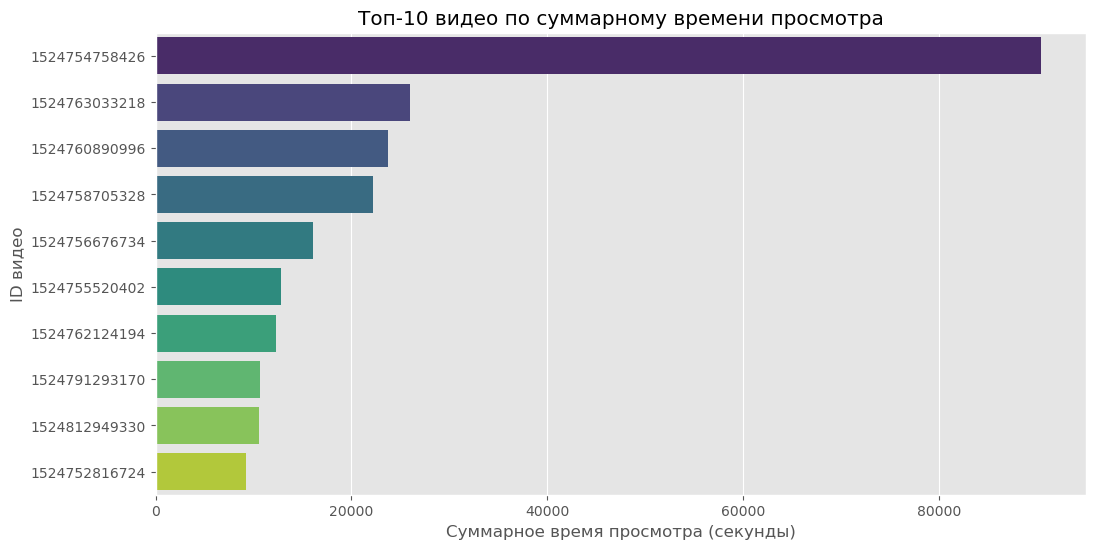

In [30]:
video_view_time = df_no_outliers.groupby('video_id')['total_view_time'].sum().sort_values(ascending=False).head(10)

print("Топ-10 видео по суммарному времени просмотра (в секундах):")
print(video_view_time)

top_videos = df_no_outliers[df_no_outliers['video_id'].isin(video_view_time.index)]
video_community_mapping = top_videos.groupby('video_id')['video_owner_id'].first()

print("\nСообщества топ-10 видео:")
print(video_community_mapping)

plt.figure()
sns.barplot(x=video_view_time.values, y=video_view_time.index.astype(str), hue=video_view_time.index.astype(str), palette='viridis', legend=False)
plt.title('Топ-10 видео по суммарному времени просмотра')
plt.xlabel('Суммарное время просмотра (секунды)')
plt.ylabel('ID видео')
plt.show()

Количество длинных просмотров (>1 час) по платформам:
vk_platform
vk_video_ios        24
vk_video_android    20
Name: count, dtype: int64

Количество длинных просмотров (>1 час) по экранам:
nav_screen
video_for_you         18
video_search          14
video_my_history       9
video_playlist         1
video_my_bookmarks     1
video_group_all        1
Name: count, dtype: int64

Среднее время просмотра длинных видео (>1 час) по платформам и экранам (в секундах):
vk_platform       nav_screen        
vk_video_android  video_search          8200.111111
vk_video_ios      video_for_you         7772.909091
                  video_my_history      7650.666667
vk_video_android  video_my_history      7130.666667
vk_video_ios      video_search          6916.000000
vk_video_android  video_for_you         5930.857143
vk_video_ios      video_my_bookmarks    4548.000000
vk_video_android  video_group_all       4385.000000
vk_video_ios      video_playlist        3885.000000
Name: total_view_time, dtype: fl

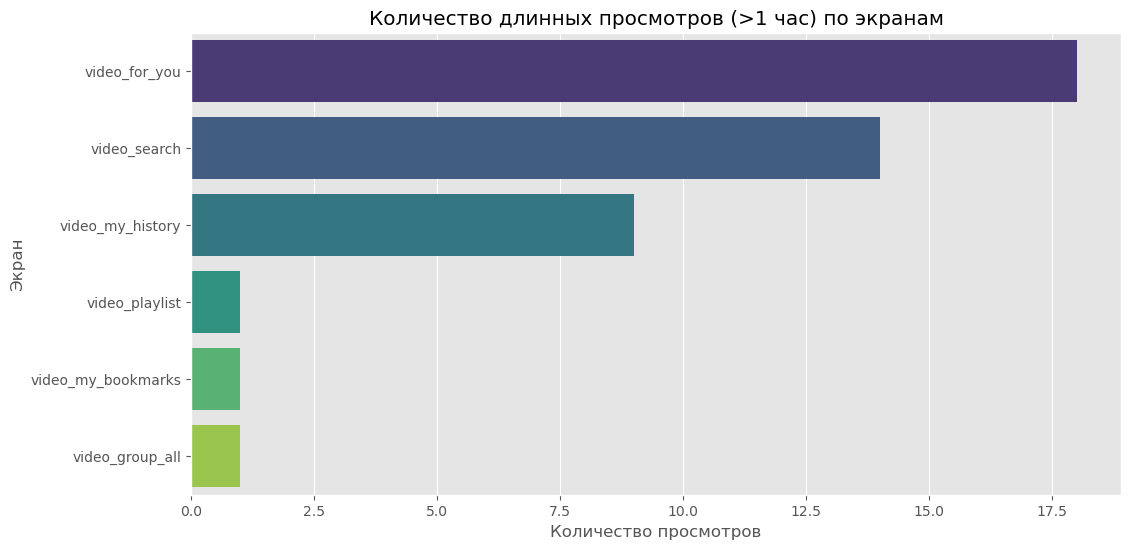

In [31]:
df = pd.read_csv('video_sessions_transformed.csv')
df = df[df['total_view_time'] >= 0]
df_no_outliers = df[df['total_view_time'] <= 86400].copy()  # Очистка и копия

def classify_duration(time):
    if time <= 300:  # Меньше 5 минут
        return 'Меньше 5 минут'
    elif time <= 3600:  # Меньше 1 часа
        return 'Меньше 1 часа'
    else:
        return 'Больше 1 часа'

df_no_outliers.loc[:, 'duration_category'] = df_no_outliers['total_view_time'].apply(classify_duration)

long_videos = df_no_outliers[df_no_outliers['duration_category'] == 'Больше 1 часа']

long_by_platform = long_videos['vk_platform'].value_counts()
print("Количество длинных просмотров (>1 час) по платформам:")
print(long_by_platform)

long_by_screen = long_videos['nav_screen'].value_counts()
print("\nКоличество длинных просмотров (>1 час) по экранам:")
print(long_by_screen)

long_avg_by_platform_screen = long_videos.groupby(['vk_platform', 'nav_screen'])['total_view_time'].mean().sort_values(ascending=False)
print("\nСреднее время просмотра длинных видео (>1 час) по платформам и экранам (в секундах):")
print(long_avg_by_platform_screen)

plt.figure()
sns.barplot(x=long_by_screen.values, y=long_by_screen.index, hue=long_by_screen.index, palette='viridis', legend=False)
plt.title('Количество длинных просмотров (>1 час) по экранам')
plt.xlabel('Количество просмотров')
plt.ylabel('Экран')
plt.show()

Количество просмотров (Меньше 1 часа) по платформам:
vk_platform
vk_video_android    163
vk_video_ios         71
Name: count, dtype: int64

Количество просмотров (Меньше 1 часа) по экранам:
nav_screen
video_search          95
video_for_you         61
video_my_history      58
video_group_all       15
video_my_added         2
video_group_main       1
video_playlist         1
video_my_bookmarks     1
Name: count, dtype: int64

Среднее время просмотра видео (Меньше 1 часа) по платформам и экранам (в секундах):
vk_platform       nav_screen        
vk_video_ios      video_for_you         1953.071429
                  video_search          1921.906250
vk_video_android  video_my_added        1676.500000
vk_video_ios      video_my_history      1646.333333
vk_video_android  video_group_all       1591.533333
                  video_my_bookmarks    1500.000000
                  video_my_history      1367.147059
                  video_search          1342.746032
vk_video_ios      video_playlist   

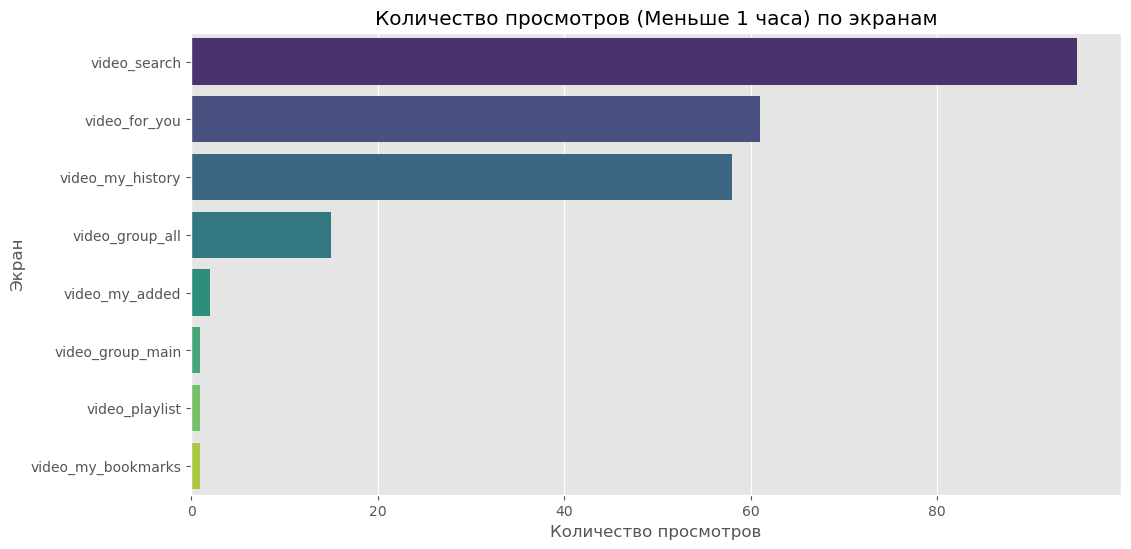

In [32]:
medium_videos = df_no_outliers[df_no_outliers['duration_category'] == 'Меньше 1 часа']

medium_by_platform = medium_videos['vk_platform'].value_counts()
print("Количество просмотров (Меньше 1 часа) по платформам:")
print(medium_by_platform)

medium_by_screen = medium_videos['nav_screen'].value_counts()
print("\nКоличество просмотров (Меньше 1 часа) по экранам:")
print(medium_by_screen)

medium_avg_by_platform_screen = medium_videos.groupby(['vk_platform', 'nav_screen'])['total_view_time'].mean().sort_values(ascending=False)
print("\nСреднее время просмотра видео (Меньше 1 часа) по платформам и экранам (в секундах):")
print(medium_avg_by_platform_screen)

plt.figure()
sns.barplot(x=medium_by_screen.values, y=medium_by_screen.index, hue=medium_by_screen.index, palette='viridis', legend=False)
plt.title('Количество просмотров (Меньше 1 часа) по экранам')
plt.xlabel('Количество просмотров')
plt.ylabel('Экран')
plt.show()

Среднее время просмотра по экранам и категориям длительности (в секундах):
duration_category   Больше 1 часа  Меньше 1 часа  Меньше 5 минут
nav_screen                                                      
catalog_other                 NaN            NaN       34.571429
video_for_you         7056.555556    1373.032787        3.220347
video_group_all       4385.000000    1591.533333       15.592105
video_group_main              NaN     633.000000        0.000000
video_my_added                NaN    1676.500000       17.333333
video_my_bookmarks    4548.000000    1500.000000       12.500000
video_my_history      7477.333333    1482.672414       73.964286
video_playlist        3885.000000    1204.000000        1.000000
video_search          7741.500000    1537.831579        4.419091


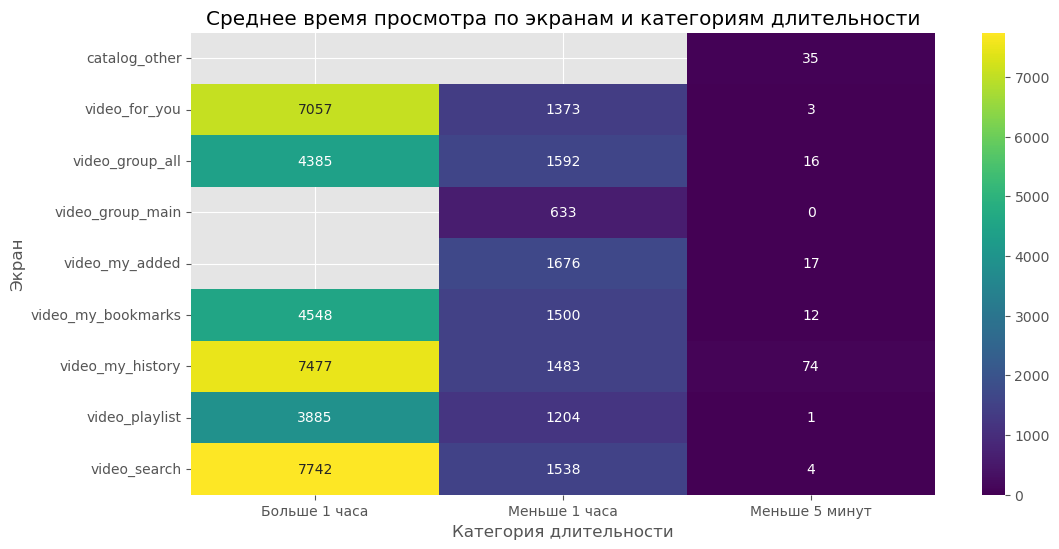

In [33]:
def classify_duration(time):
    if time <= 300:  # Меньше 5 минут
        return 'Меньше 5 минут'
    elif time <= 3600:  # Меньше 1 часа
        return 'Меньше 1 часа'
    else:
        return 'Больше 1 часа'

df_no_outliers['duration_category'] = df_no_outliers['total_view_time'].apply(classify_duration)

screen_duration_avg = df_no_outliers.groupby(['nav_screen', 'duration_category'])['total_view_time'].mean().unstack()

print("Среднее время просмотра по экранам и категориям длительности (в секундах):")
print(screen_duration_avg)

plt.figure()
sns.heatmap(screen_duration_avg, annot=True, fmt='.0f', cmap='viridis')
plt.title('Среднее время просмотра по экранам и категориям длительности')
plt.xlabel('Категория длительности')
plt.ylabel('Экран')
plt.show()

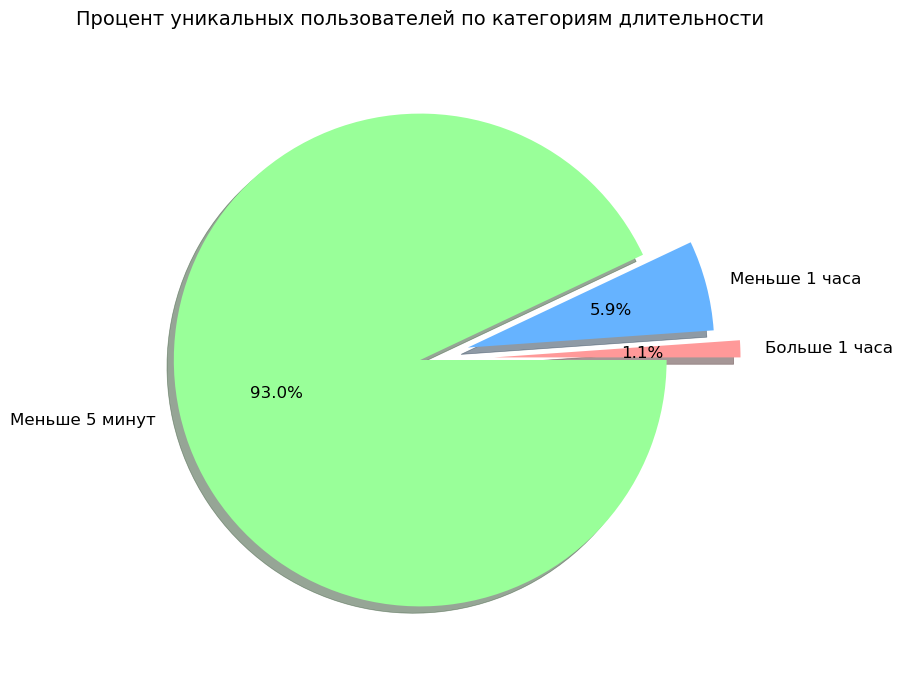

In [34]:
user_by_duration = df_no_outliers.groupby('duration_category')['user_id'].nunique()
plt.figure(figsize=(8, 8))
explode = (0.3, 0.2, 0)  
plt.pie(user_by_duration, labels=user_by_duration.index, autopct='%1.1f%%', 
        colors=['#ff9999', '#66b3ff', '#99ff99'], explode=explode, 
        shadow=True, textprops={'fontsize': 12}, labeldistance=1.1)
plt.title('Процент уникальных пользователей по категориям длительности', fontsize=14, pad=20)
plt.show()

In [35]:
# Количество просмотров по категориям длительности
views_by_duration = df_no_outliers.groupby('duration_category')['total_view_time'].count()

print("Количество просмотров по категориям длительности:")
print(views_by_duration)

# Среднее время просмотра на просмотр
avg_time_per_view = df_no_outliers.groupby('duration_category')['total_view_time'].mean()

print("\nСреднее время на просмотр в каждой категории (в секундах):")
print(avg_time_per_view)

Количество просмотров по категориям длительности:
duration_category
Больше 1 часа       44
Меньше 1 часа      234
Меньше 5 минут    4222
Name: total_view_time, dtype: int64

Среднее время на просмотр в каждой категории (в секундах):
duration_category
Больше 1 часа     7170.750000
Меньше 1 часа     1480.371795
Меньше 5 минут       4.567504
Name: total_view_time, dtype: float64


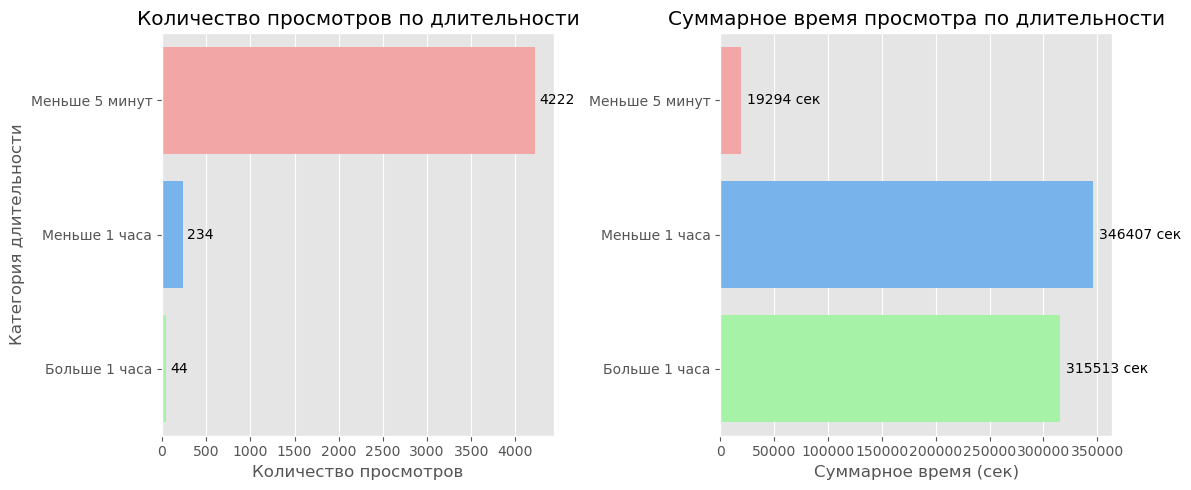

In [36]:
data = {
    'duration_category': ['Меньше 5 минут', 'Меньше 1 часа', 'Больше 1 часа'],
    'views': [4222, 234, 44],
    'total_view_time': [19294, 346407, 315513]
}
df_summary = pd.DataFrame(data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Количество просмотров
sns.barplot(data=df_summary, x='views', y='duration_category', hue='duration_category', 
            palette=['#ff9999', '#66b3ff', '#99ff99'], legend=False, ax=ax1)
for i, value in enumerate(df_summary['views']):
    ax1.text(value + 50, i, f'{value}', va='center')
ax1.set_title('Количество просмотров по длительности')
ax1.set_xlabel('Количество просмотров')
ax1.set_ylabel('Категория длительности')

# Суммарное время просмотра
sns.barplot(data=df_summary, x='total_view_time', y='duration_category', hue='duration_category', 
            palette=['#ff9999', '#66b3ff', '#99ff99'], legend=False, ax=ax2)
for i, value in enumerate(df_summary['total_view_time']):
    ax2.text(value + 5000, i, f'{value} сек', va='center')
ax2.set_title('Суммарное время просмотра по длительности')
ax2.set_xlabel('Суммарное время (сек)')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

Количество просмотров по платформам и категориям длительности:
duration_category  Больше 1 часа  Меньше 1 часа  Меньше 5 минут
vk_platform                                                    
vk_video_android              20            163            3112
vk_video_ios                  24             71            1110

Среднее время просмотра по платформам и категориям длительности (в секундах):
duration_category  Больше 1 часа  Меньше 1 часа  Меньше 5 минут
vk_platform                                                    
vk_video_android     7054.700000    1330.349693        4.906491
vk_video_ios         7267.458333    1824.788732        3.617117


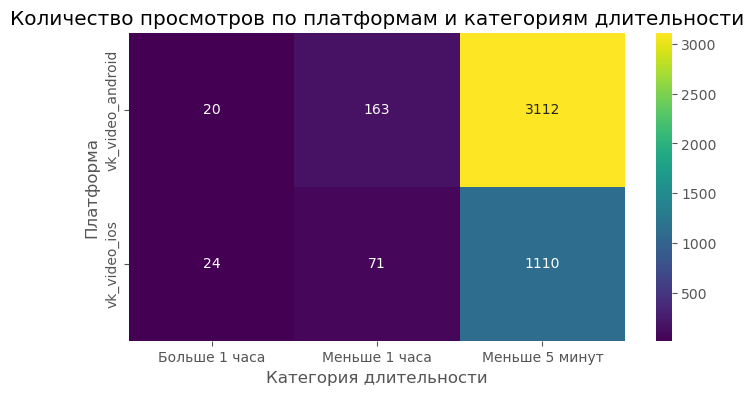

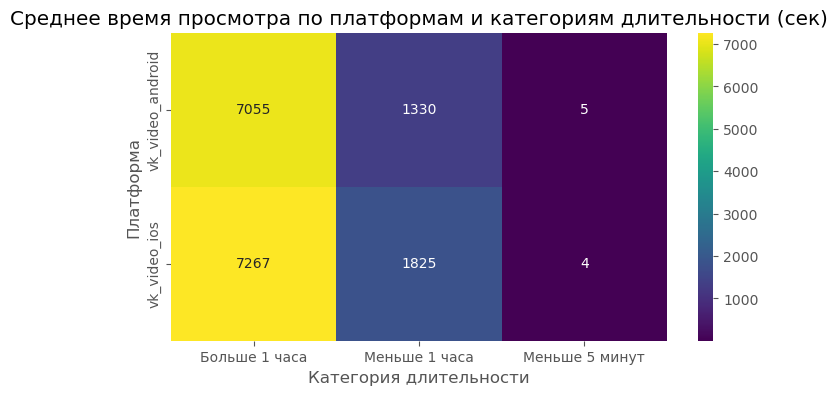

In [37]:
platform_duration_counts = df_no_outliers.groupby(['vk_platform', 'duration_category'])['total_view_time'].count().unstack()

print("Количество просмотров по платформам и категориям длительности:")
print(platform_duration_counts)

platform_duration_avg = df_no_outliers.groupby(['vk_platform', 'duration_category'])['total_view_time'].mean().unstack()

print("\nСреднее время просмотра по платформам и категориям длительности (в секундах):")
print(platform_duration_avg)

plt.figure(figsize=(8, 4))
sns.heatmap(platform_duration_counts, annot=True, fmt='.0f', cmap='viridis')
plt.title('Количество просмотров по платформам и категориям длительности')
plt.xlabel('Категория длительности')
plt.ylabel('Платформа')
plt.show()

plt.figure(figsize=(8, 4))
sns.heatmap(platform_duration_avg, annot=True, fmt='.0f', cmap='viridis')
plt.title('Среднее время просмотра по платформам и категориям длительности (сек)')
plt.xlabel('Категория длительности')
plt.ylabel('Платформа')
plt.show()

Коэффициент Крамера V: 0.297
p-значение: 3.610e-158


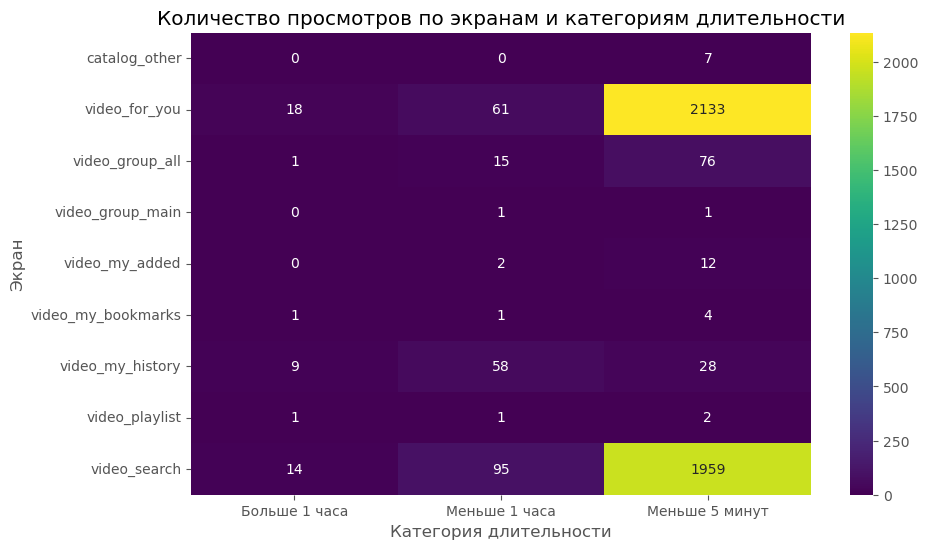

In [38]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_no_outliers['nav_screen'], df_no_outliers['duration_category'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramer_v = np.sqrt(phi2 / min(r-1, k-1))

print(f"Коэффициент Крамера V: {cramer_v:.3f}")
print(f"p-значение: {p:.3e}")

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='.0f', cmap='viridis')
plt.title('Количество просмотров по экранам и категориям длительности')
plt.xlabel('Категория длительности')
plt.ylabel('Экран')
plt.show()

Среднее количество просмотров на пользователя по предпочитаемой категории длительности:
preferred_duration
Больше 1 часа     1.000000
Меньше 1 часа     1.034188
Меньше 5 минут    1.147916
Name: num_views, dtype: float64


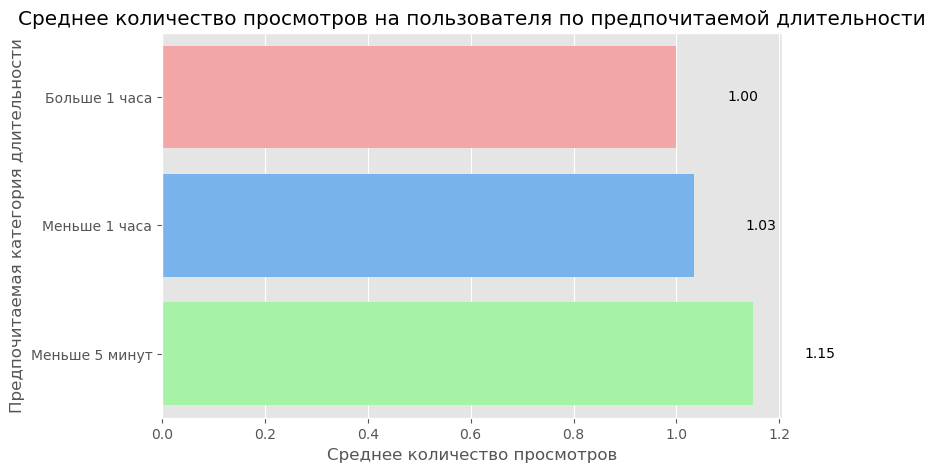

In [39]:
# Количество просмотров на пользователя
user_views = df_no_outliers.groupby('user_id')['total_view_time'].count().rename('num_views')

# Преобладающая категория длительности для каждого пользователя
user_duration = df_no_outliers.groupby(['user_id', 'duration_category'])['total_view_time'].count().unstack().idxmax(axis=1).rename('preferred_duration')

# Объединяем данные
user_behavior = pd.DataFrame({'num_views': user_views, 'preferred_duration': user_duration})

# Среднее количество просмотров по предпочитаемой категории длительности
avg_views_by_duration = user_behavior.groupby('preferred_duration')['num_views'].mean()

print("Среднее количество просмотров на пользователя по предпочитаемой категории длительности:")
print(avg_views_by_duration)

# Визуализация: Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_views_by_duration.values, y=avg_views_by_duration.index, hue=avg_views_by_duration.index, 
            palette=['#ff9999', '#66b3ff', '#99ff99'], legend=False)
for i, value in enumerate(avg_views_by_duration.values):
    plt.text(value + 0.1, i, f'{value:.2f}', va='center')
plt.title('Среднее количество просмотров на пользователя по предпочитаемой длительности')
plt.xlabel('Среднее количество просмотров')
plt.ylabel('Предпочитаемая категория длительности')
plt.show()